# *k* - Nearest Neighbors Algorithm

#### This notebook explores different examples of *k*-NN

## util.py

In [1]:
from __future__ import print_function, division
from builtins import range, input

import numpy as np
import pandas as pd

def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('MNIST_Data/train.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y


## knn.py

Reading in and transforming data...

k = 1
Training time: 0:00:00
Train accuracy: 1.0
Time to compute train accuracy: 0:00:16.307000 Train size: 1000
Test accuracy: 0.876
Time to compute test accuracy: 0:00:21.612000 Test size: 1000

k = 2
Training time: 0:00:00
Train accuracy: 0.941
Time to compute train accuracy: 0:00:16.483000 Train size: 1000
Test accuracy: 0.845
Time to compute test accuracy: 0:00:22.281000 Test size: 1000

k = 3
Training time: 0:00:00
Train accuracy: 0.95
Time to compute train accuracy: 0:00:16.229000 Train size: 1000
Test accuracy: 0.868
Time to compute test accuracy: 0:00:29.363000 Test size: 1000

k = 4
Training time: 0:00:00
Train accuracy: 0.927
Time to compute train accuracy: 0:00:18.927000 Train size: 1000
Test accuracy: 0.864
Time to compute test accuracy: 0:00:22.093000 Test size: 1000

k = 5
Training time: 0:00:00
Train accuracy: 0.926
Time to compute train accuracy: 0:00:17.924000 Train size: 1000
Test accuracy: 0.864
Time to compute test accuracy: 0:0

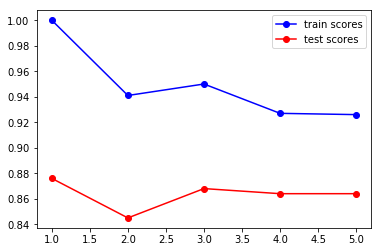

In [2]:
# This is an example of a K-Nearest Neighbors classifier on MNIST data.
# We try k=1...5 to show how we might choose the best k.

from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
# Note: You can't use SortedDict because the key is distance
# if 2 close points are the same distance away, one will be overwritten
from util import get_data
from datetime import datetime


class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j,xt in enumerate(self.X): # training points
                diff = x - xt
                d = diff.dot(diff) #square-distance
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            # print "input:", x
            # print "sl:", sl

            # vote
            votes = {}
            for _, v in sl:
                # print "v:", v
                votes[v] = votes.get(v,0) + 1
            # print "votes:", votes, "true:", Ytest[i]
            max_votes = 0
            max_votes_class = -1
            for v,count in iteritems(votes):
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)


if __name__ == '__main__':
    X, Y = get_data(2000)
    Ntrain = 1000
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    train_scores = []
    test_scores = []
    ks = (1,2,3,4,5)
    for k in ks:
        print("\nk =", k)
        knn = KNN(k)
        t0 = datetime.now()
        knn.fit(Xtrain, Ytrain)
        print("Training time:", (datetime.now() - t0))

        t0 = datetime.now()
        train_score = knn.score(Xtrain, Ytrain)
        train_scores.append(train_score)
        print("Train accuracy:", train_score)
        print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

        t0 = datetime.now()
        test_score = knn.score(Xtest, Ytest)
        print("Test accuracy:", test_score)
        test_scores.append(test_score)
        print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    plt.plot(ks, train_scores, 'bo-', label='train scores')
    plt.plot(ks, test_scores, 'ro-', label='test scores')
    plt.legend()
    plt.show()

## knn_fail.py

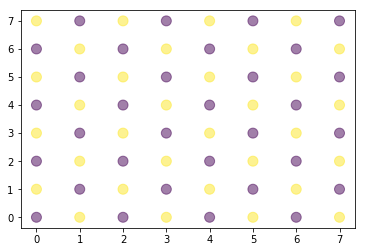

Train accuracy: 0.0


In [3]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import matplotlib.pyplot as plt
from knn import KNN

def get_data():
    width = 8
    height = 8
    N = width * height
    X = np.zeros((N, 2))
    Y = np.zeros(N)
    n = 0
    start_t = 0
    for i in range(width):
        t = start_t
        for j in range(height):
            X[n] = [i, j]
            Y[n] = t
            n += 1
            t = (t + 1) % 2 # alternate between 0 and 1
        start_t = (start_t + 1) % 2
    return X, Y


if __name__ == '__main__':
    X, Y = get_data()

    # display the data
    plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
    plt.show()

    # get the accuracy
    model = KNN(3)
    model.fit(X, Y)
    print("Train accuracy:", model.score(X, Y))


## knn_xor.py

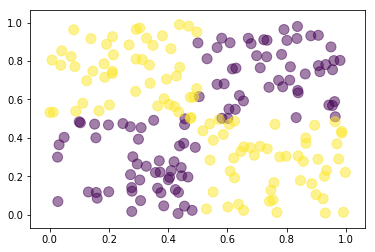

Accuracy: 0.98


In [4]:
from __future__ import print_function, division
from builtins import range, input

from knn import KNN
from util import get_xor
import matplotlib.pyplot as plt

if __name__ == '__main__':
    X, Y = get_xor()

    # display the data
    plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
    plt.show()

    # get the accuracy
    model = KNN(3)
    model.fit(X, Y)
    print("Accuracy:", model.score(X, Y))

## knn_donut.py

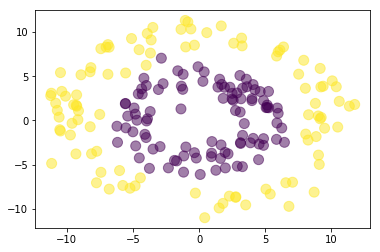

Accuracy: 0.995


In [5]:
from __future__ import print_function, division
from builtins import range, input

from knn import KNN
from util import get_donut
import matplotlib.pyplot as plt

if __name__ == '__main__':
    X, Y = get_donut()

    # display the data
    plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
    plt.show()

    # get the accuracy
    model = KNN(3)
    model.fit(X, Y)
    print("Accuracy:", model.score(X, Y))

## *knn_vectorized.py*

### Improvement to KNN algorithm

Reading in and transforming data...

k = 1
Training time: 0:00:00
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.153000 Train size: 1000
Test accuracy: 0.872
Time to compute test accuracy: 0:00:00.160000 Test size: 1000

k = 2
Training time: 0:00:00
Train accuracy: 0.925
Time to compute train accuracy: 0:00:00.157000 Train size: 1000
Test accuracy: 0.855
Time to compute test accuracy: 0:00:00.163000 Test size: 1000

k = 3
Training time: 0:00:00
Train accuracy: 0.917
Time to compute train accuracy: 0:00:00.157000 Train size: 1000
Test accuracy: 0.869
Time to compute test accuracy: 0:00:00.150000 Test size: 1000

k = 4
Training time: 0:00:00
Train accuracy: 0.906
Time to compute train accuracy: 0:00:00.163000 Train size: 1000
Test accuracy: 0.884
Time to compute test accuracy: 0:00:00.182000 Test size: 1000

k = 5
Training time: 0:00:00
Train accuracy: 0.904
Time to compute train accuracy: 0:00:00.168000 Train size: 1000
Test accuracy: 0.879
Time to compute test accuracy: 0:

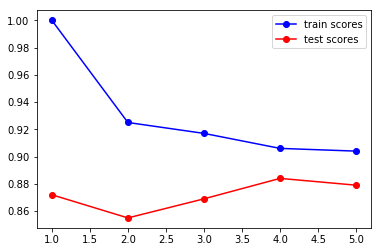

In [6]:
# This is an example of a K-Nearest Neighbors classifier on MNIST data.
# We try k=1...5 to show how we might choose the best k.
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import matplotlib.pyplot as plt
from util import get_data
from datetime import datetime
from sklearn.metrics.pairwise import pairwise_distances


class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        N = len(X)
        y = np.zeros(N)

        # returns distances in a matrix
        # of shape (N_test, N_train)
        distances = pairwise_distances(X, self.X)
        

        # now get the minimum k elements' indexes
        # https://stackoverflow.com/questions/16817948/i-have-need-the-n-minimum-index-values-in-a-numpy-array
        idx = distances.argsort(axis=1)[:, :self.k]

        # now determine the winning votes
        # each row of idx contains indexes from 0..Ntrain
        # corresponding to the indexes of the closest samples
        # from the training set
        # NOTE: if you don't "believe" this works, test it
        # in your console with simpler arrays
        votes = self.y[idx]

        # now y contains the classes in each row
        # e.g.
        # sample 0 --> [class0, class1, class1, class0, ...]
        # unfortunately there's no good way to vectorize this
        # https://stackoverflow.com/questions/19201972/can-numpy-bincount-work-with-2d-arrays
        for i in range(N):
            y[i] = np.bincount(votes[i]).argmax()
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)


if __name__ == '__main__':
    X, Y = get_data(2000)
    Ntrain = 1000
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    train_scores = []
    test_scores = []
    ks = (1,2,3,4,5)
    for k in ks:
        print("\nk =", k)
        knn = KNN(k)
        t0 = datetime.now()
        knn.fit(Xtrain, Ytrain)
        print("Training time:", (datetime.now() - t0))

        t0 = datetime.now()
        train_score = knn.score(Xtrain, Ytrain)
        train_scores.append(train_score)
        print("Train accuracy:", train_score)
        print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

        t0 = datetime.now()
        test_score = knn.score(Xtest, Ytest)
        print("Test accuracy:", test_score)
        test_scores.append(test_score)
        print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    plt.plot(ks, train_scores, 'bo-', label='train scores')
    plt.plot(ks, test_scores, 'ro-', label='test scores')
    plt.legend()
    plt.show()